# Fitting statistical distributions to univariate data

There isn't always a clear or consensus way of fitting a KDE to some data particularly in histogram form for continuous and discrete distribution types.

We attempt to solve this with the combination of `turb.stats.univariate_kde` and `turb.plot.histogram`.

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../../turbopanda/")
import turbopanda as turb

%matplotlib inline

## Parameters of the histogram:

Firstly let's try to plot a basic normal distribution:

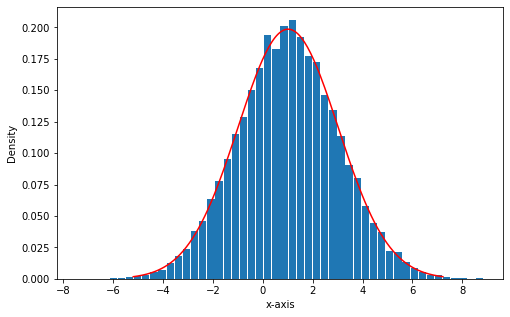

In [2]:
x = stats.norm.rvs(loc=1, scale=2., size=20000)
_=turb.plot.histogram(x)

Within `histogram` we can choose to specify *custom* bins if we want, but the default selections are usually pretty good.

The `kde` parameter determines if we calculate the KDE or not, which is optional.

By default, a normal kde distribution is imputed:

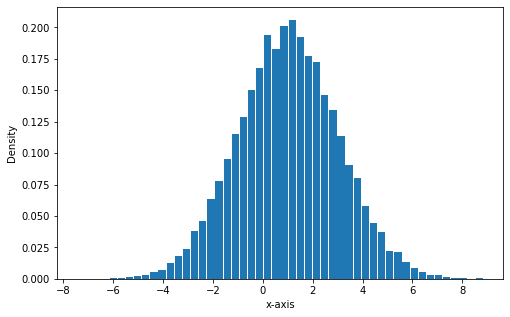

In [3]:
_=turb.plot.histogram(x, kde=None)

Statistical information regarding the histogram can be displayed using the `stat` keyword:

This gives the mean, standard deviation, skew and kurtosis parameters.

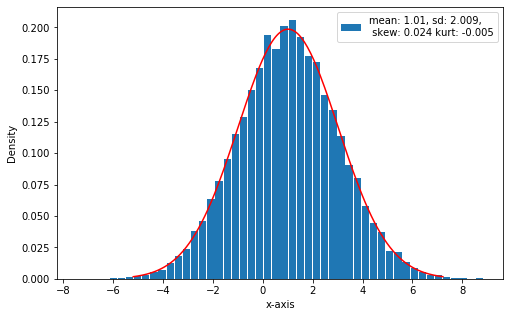

In [4]:
turb.plot.histogram(x, stat=True)

Additionally, if you work with `pandas.Series` and the series has a name, the name is automatically extracted or you can define it yourself:

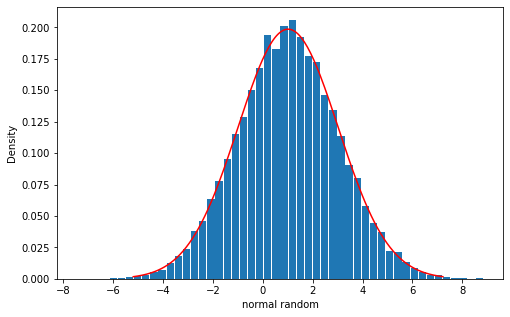

In [5]:
turb.plot.histogram(x, x_label='normal random')

## One step deeper, `univariate_kde`

The actual KDE is calculated from another function which you can access:

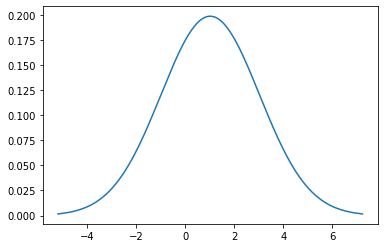

In [6]:
xkd, ykd = turb.stats.univariate_kde(x, kde_name='norm')
_ = plt.plot(xkd, ykd)

## Auto-selecting the distribution

In [55]:
from scipy import stats

In [51]:
dists = ['norm', 'exponnorm', 't', 'gamma', 'chi2']

In [52]:
import numpy as np
def rmse(x,y):
    return np.sqrt(np.mean(np.square(x - y)))

In [54]:
for d in dists:
    z1,z2,m = turb.stats.univariate_kde(x, kde_name=d, return_dist=True)
    v_, agg = stats.probplot(x, sparams=m.args, dist=m.dist)
    print("dist: '{}', score={:0.3f}".format(d, rmse(v_[0], v_[1])))

dist: 'norm', score=0.901
dist: 'exponnorm', score=0.287
dist: 't', score=1.201
dist: 'gamma', score=0.082
dist: 'chi2', score=0.082


(array([0.21497074, 0.179428  , 0.09177114, 0.046057  , 0.01942851,
        0.01085711, 0.0054857 , 0.00171428, 0.00137142, 0.00034286]),
 array([3.57831970e-03, 1.75358390e+00, 3.50358947e+00, 5.25359505e+00,
        7.00360063e+00, 8.75360621e+00, 1.05036118e+01, 1.22536174e+01,
        1.40036229e+01, 1.57536285e+01, 1.75036341e+01]),
 <a list of 10 Patch objects>)

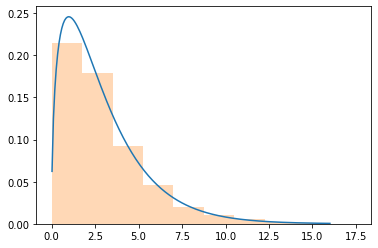

In [45]:
plt.plot(z1, z2)
plt.hist(x, alpha=.3, density=True)

In [59]:
import string

'abcdefghijklmnopqrstuvwxyz'

In [75]:
potensh = [getattr(stats,s) for s in dir(stats) if \
           not s.startswith("_") and s[0] in string.ascii_lowercase and hasattr(getattr(stats,s), "rvs")]

In [76]:
potensh

 scipy.stats._distn_infrastructure.rv_continuous,
 scipy.stats._distn_infrastructure.rv_discrete,
 scipy.stats._continuous_distns.rv_histogram,

In [69]:
potensh

[_Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0), 16384),
 <function scipy.stats.morestats.anderson(x, dist='norm')>,
 <function scipy.stats.morestats.anderson_ksamp(samples, midrank=True)>,
 <function scipy.stats.morestats.ansari(x, y)>,
 <function scipy.stats.morestats.bartlett(*args)>,
 <function scipy.stats.morestats.bayes_mvs(data, alpha=0.9)>,
 <function scipy.stats._binned_statistic.binned_statistic(x, values, statistic='mean', bins=10, range=None)>,
 <function scipy.stats._binned_statistic.binned_statistic_2d(x, y, values, statistic='mean', bins=10, range=None, expand_binnumbers=False)>,
 <function scipy.stats._binned_statistic.binned_statistic_dd(sample, values, statistic='mean', bins=10, range=None, expand_binnumbers=False)>,
 <function scipy.stats.morestats.binom_test(x, n=None, p=0.5, alternative='two-sided')>,
 <function scipy.stats.morestats.boxcox(x, lmbda=None, alpha=None)>,
 <function scipy.stats.morestats.boxcox_llf(lmb, data)>,
 <function scipy.stats.morestats.

((array([6.71355926e-03, 1.18855246e-02, 1.61190650e-02, ...,
         1.72965284e+01, 1.82624961e+01, 2.00924738e+01]),
  array([3.57831970e-03, 1.08323427e-02, 1.33194355e-02, ...,
         1.61362406e+01, 1.64702237e+01, 1.75036341e+01])),
 (1.0049841160352035, -0.01393609215686098, 0.9994431012079474))

## Testing different distributions

Here we will test a number of continuous and discrete distributions:

### T-distribution

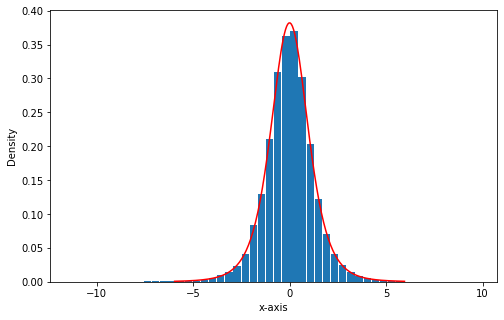

In [8]:
x = stats.t.rvs(df=5, size=20000)
_=turb.plot.histogram(x, kde='t')

### Exponential distribution

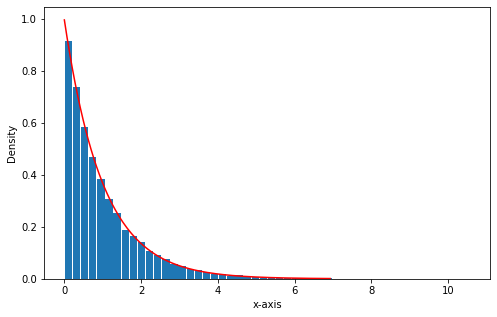

In [9]:
x = stats.expon.rvs(size=20000)
_=turb.plot.histogram(x, kde='expon')

## $\chi^2$-distribution

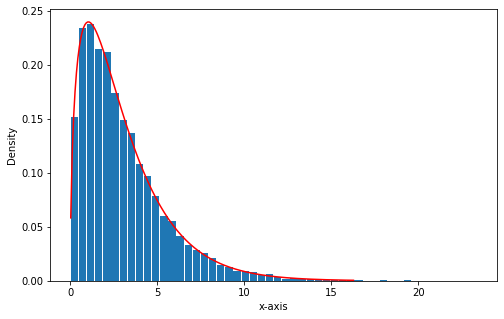

In [10]:
x = stats.chi2.rvs(df=3, size=20000)
_=turb.plot.histogram(x, kde='chi2')

## Discrete distributions

Due to the lack of support from Scipy in fitting the parameters easily for discrete distributions, we have limited support, but we support the most important distributions:

### Bernoulli distribution

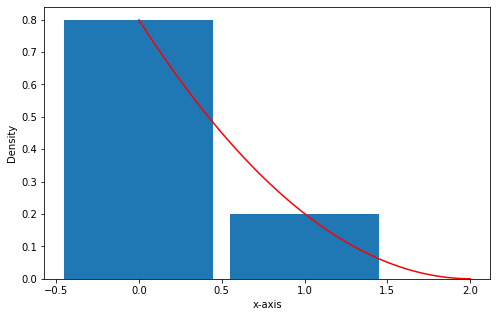

In [11]:
x = stats.bernoulli.rvs(p=.2, size=20000)
_=turb.plot.histogram(x, kde='bernoulli')

### Binomial distribution

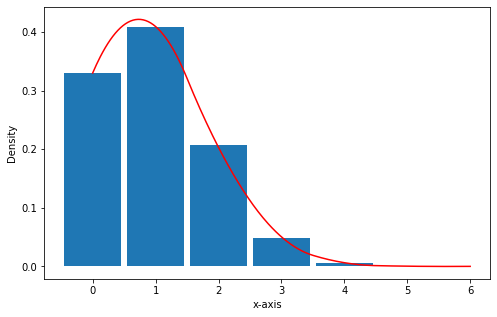

In [12]:
x = stats.binom.rvs(n=5, p=.2, size=20000)
_=turb.plot.histogram(x, kde='binom')

### Poisson distribution

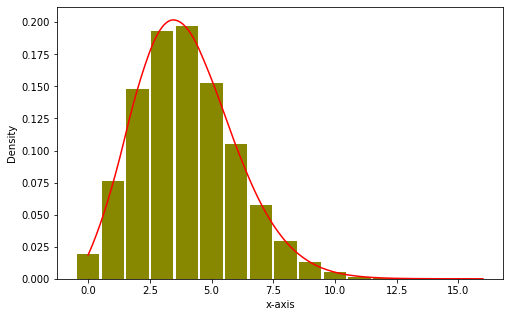

In [13]:
x = stats.poisson.rvs(mu=4, size=20000)
_=turb.plot.histogram(x, kde='poisson', facecolor='#888800')